<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:300%; font-family:Arial, sans-serif; background-color:#0008ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>🎓 PROYECTO IAA </b></div>

### <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:50%; font-family:Arial, sans-serif; background-color:#BCE5FB; color:#013D41; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 📚 Importación de librerías</b></div>

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()
pd.set_option('display.max_columns', None)

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. 📊 Análisis EDA </b></div>

In [5]:
df = pd.read_csv('./Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. 📊 Análisis EDA </b></div>

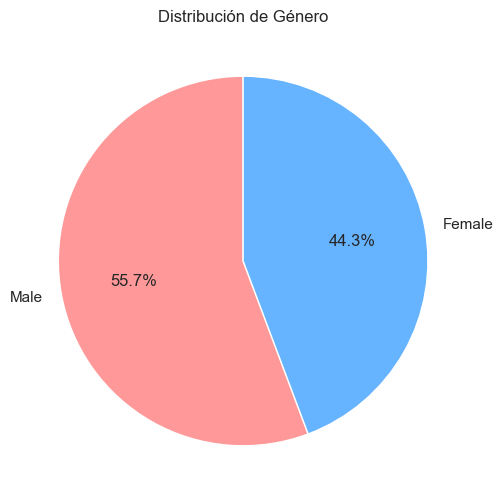

In [6]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribución de Género')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.2. SUBTITULLOOOO</b></div>

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 2.2.1. SUB-SUBTITULOO (FB) </b></div>

In [ ]:
# ALVARO 12:06

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 2. 📊 Entrenamiento de modelos </b></div>

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. 📊 Resultados y Visualización </b></div>

### Prueba de commit de jorge 12

Prueba de commit 2: Mati